<a href="https://colab.research.google.com/github/Petek1010/ML_exercises/blob/main/ClassifyingMovieReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying movie reviews (binary classification)

**Task**: Classfy movie reviews as positive or negative, based on the text content of the reviews. For the simplicity a sequences of words have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


We are dealing with 50 000 reviews (25 000 for training and 25 000 for testing) and with 10 000 most frequently occurring words.

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Decoding reviews back to text:

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
print(decoded_review)

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


Encoding the integers into a vector

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
         results[i, j] = 1.
    return results


In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
print('First line of x_train: ',x_train[0])
print('Testing: ',x_train[:,4])
print('And whole x_train: ', x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)

First line of x_train:  [0. 1. 1. ... 0. 0. 0.]
Testing:  [1. 1. 1. ... 1. 1. 1.]
And whole x_train:  [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[1. 0. 0. ... 0. 1. 0.]
(25000, 10000)
(25000,)


Building our model. The input data is vectors, and the labels are scalars (1s and 0s): this is one of the simplest
problem setups you’ll ever encounter. A type of model that performs well on such a prob-
lem is a plain stack of densely connected (Dense) layers with relu activations





In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") #  a sigmoid “squashes” arbitrary
    # values into the [0, 1] interval, outputting something that can be
    # interpreted as a probability.
])

Defining loss function and optimizer

In [6]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])



Creating a validation set, to monitor the accuracy of the model during training:

In [16]:
x_val = x_train[:10000] # First 10 000 reviews
partial_x_train = x_train[10000:] # The rest of 15 000 reviews
print(partial_x_train.shape)

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

(15000, 10000)


Training:

In [18]:
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.6436 - loss: 0.6391 - val_accuracy: 0.8591 - val_loss: 0.4587
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8832 - loss: 0.3967 - val_accuracy: 0.8781 - val_loss: 0.3396
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9154 - loss: 0.2734 - val_accuracy: 0.8900 - val_loss: 0.2893
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9306 - loss: 0.2104 - val_accuracy: 0.8870 - val_loss: 0.2765
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9441 - loss: 0.1727 - val_accuracy: 0.8826 - val_loss: 0.2984
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9536 - loss: 0.1470 - val_accuracy: 0.8862 - val_loss: 0.2850
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9628 - loss: 0.1208 - val_accuracy: 0.8855 - val_loss: 0.2931
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9727 - loss: 0.0983 - val_accuracy: 0.8834 - 

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

From the history_dict we can plot training and validation loss:

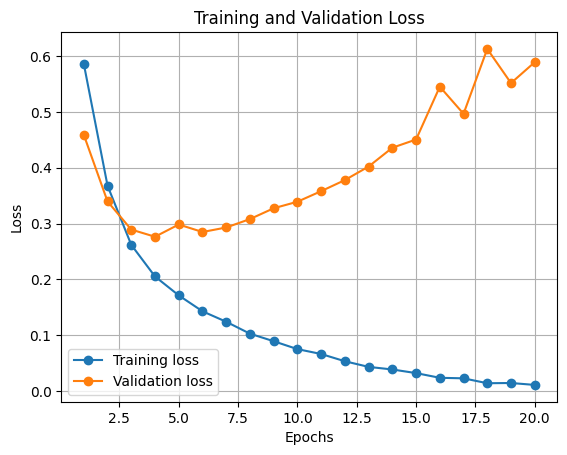

In [24]:
from matplotlib import pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "-o" ,label='Training loss')
plt.plot(epochs, val_loss_values,"-o" , label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

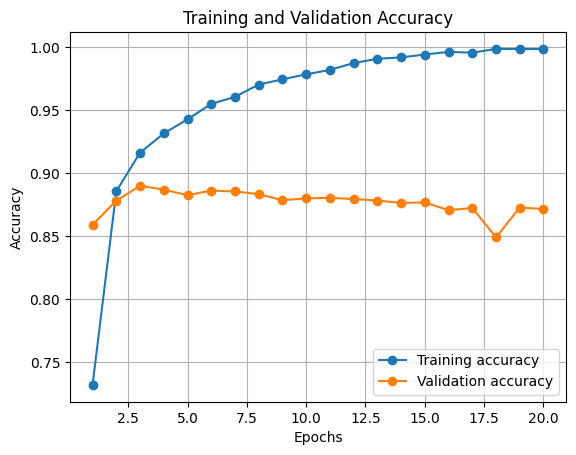

In [25]:
accu_values = history_dict['accuracy']
val_accu_values = history_dict['val_accuracy']

plt.plot(epochs, accu_values, "-o" ,label='Training accuracy')
plt.plot(epochs, val_accu_values,"-o" , label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

What we see above is an example of overfitting, after the 4. epoch.